# Code Nav String

In [96]:
import pandas as pd
import sys
import  random
import traceback
import webbrowser
from random import sample
from tqdm import tqdm
from bs4 import BeautifulSoup as bs
import bs4, requests, json
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_csv("/content/Final list1.csv")
# df.head()
ddf = pd.read_excel("US-supplier-website-10k.xlsx")
ddf.head()

,Unnamed: 0,id,name,website
0,0,2602060,Nathan Clark Team,https://www.nathanclarkteam.com
1,1,1783757,Redback Networks,https://www.ericsson.com/
2,2,2602061,Cataldo Ambulance Service,https://cataldoambulance.com
3,3,2602062,Quantum Crossings,http://quantumcrossings.com/
4,4,2602070,Ejes,http://www.ejesinc.com/


In [10]:
import bs4, requests, json

def to_dict(r):
    if all(isinstance(i, dict) for i in r):
        return {a:b for i in r for a, b in i.items()}
    if all(isinstance(i, list) for i in r):
        return [i for b in r for i in b]
    return r

def base_text(elem):
    if isinstance(elem, bs4.element.NavigableString):
        return str(elem).rstrip().lstrip()
    
    return elem.get_text(strip=True)

def get_menu(page_name):
    if page_name.name == 'li':
        #collect all li values, create a dictionary if li has a ul child
        li_text = []
        for i in page_name.contents:
            if isinstance(i, bs4.element.NavigableString) or i.select_one('ul') is None:
                if (t:=base_text(i)): #default li text
                    li_text.append(t)
            else: #li contains a ul, build a dict with li's text as key
                if li_text:
                    li_text.append({li_text.pop():to_dict([*get_menu(i)])})
                else:
                    yield to_dict([*get_menu(i)])
        yield from li_text
        return
    all_text = []
    for i in page_name.contents:
        if getattr(i, 'name', None) == 'ul':
            r = [*get_menu(i)] #get ul's li values
            e, flag = i, False
            while (e:=e.previous_sibling) is not None: #check if ul has descriptive text
                if (isinstance(e, bs4.element.NavigableString) or e.select_one('ul') is None) and base_text(e):
                    yield {base_text(e):to_dict(r)} #yield back dictionary if text exists
                    flag = True
                    break
            if not flag: yield to_dict(r)
        elif not isinstance(i, bs4.element.NavigableString):
            yield from get_menu(i) #recursively traverse element

def menu_items(link):
    page = bs4.BeautifulSoup(requests.get(link).text, 'html.parser')
    for nav in page.select('nav'): #find all `nav` elements from which to anchor search
        yield to_dict([*get_menu(nav)])      
def code_nav_string(url:str)->list:
    temp_list = []
    dic1 = dict()
    for i in menu_items(url):
        temp_list.append(i)
#     if temp_list!=[]:
    if any(temp_list):
        dic1["nav_string"]= temp_list
        return dic1
    else:
        return [] #return empty list in case of 'none' output
    
# This code return empty list for none output

In [12]:
code_nav_string('https://cercocorp.com/')

[]

In [11]:
code_nav_string('http://www.altenergystocks.com/')

[]

# Code ul_li_li

In [13]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import bs4, requests, json
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Final list1.csv")
df.head()

,URL,Code_name,Result
0,http://www.lynx.com,0,0
1,https://www.bv.com/,0,0
2,https://www.lytx.com,0,0
3,http://www.saic.com,0,0
4,http://vhb.com,0,0


In [14]:
def code_ul_li_li(url):
    headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

    html_text = requests.get(url, headers=headers).text
    soup = bs(html_text, 'html.parser')
    ul=soup.body.ul
    key =[]
    result ={}
    for li in ul.find_all("li", recursive=False):
        key = next(li.stripped_strings)
        a=li.find_all("ul")
        dic={}
        for j in range(0,len(a)):
            for k in a[j].find_all('li',recursive=False):
                if len(list(k.stripped_strings))>1:
                    dic.update({list(k.stripped_strings)[0]: list(k.stripped_strings)[1:]})
                else:
                    dic.update({list(k.stripped_strings)[0]: ""})
                    result[key]=dic
    dic2= dict()
    if result!={}:
        dic2["ul_li_li"]=result
        return dic2
    else:
        return []

In [10]:
code_ul_li_li("http://www.woznytaxco.com")

{'ul_li_li': {'Services': {'Tax Preparation': '',
   'Tax Planning': '',
   'Tax Issues': '',
   'Small Business Accounting': '',
   'Quickbooks Services': '',
   'Payroll': '',
   'Audits': '',
   'Bank Financing': '',
   'Strategic Business Planning': '',
   'New Business Formation': '',
   'Non-Profit Organizations': ''},
  'Client Forms': {'Upload Files': ''}}}

# Code ul_li

In [15]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import bs4, requests, json
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Final list1.csv")
df.head()

,URL,Code_name,Result
0,http://www.lynx.com,0,0
1,https://www.bv.com/,0,0
2,https://www.lytx.com,0,0
3,http://www.saic.com,0,0
4,http://vhb.com,0,0


In [16]:
def code_ul_li(url):
    headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

    html_text = requests.get(url, headers=headers).text
    soup = bs(html_text, 'html.parser')
    ul=soup.body.ul
    dic3 = dict()
    e=soup.find('ul')   # finding all ul
    dic={}   # empty dictionary
    for e in e.select('li'): # for getting li in main ul
        s = list(e.stripped_strings) # stripping extra information
        if len(s)>1:  # for avoiding the repeated values
            dic.update({s[0]: s[1:]})  # will give output in dictionory form
    if dic!={}:
        dic3["ul_li"]=dic
        return dic3
    else:
        return []

In [13]:
code_ul_li("https://www.ericsson.com/")

AttributeError: 'NoneType' object has no attribute 'select'

In [14]:
code_ul_li("http://www.woznytaxco.com")

{'ul_li': {'Services': ['Tax Preparation',
   'Tax Planning',
   'Tax Issues',
   'Small Business Accounting',
   'Quickbooks Services',
   'Payroll',
   'Audits',
   'Bank Financing',
   'Strategic Business Planning',
   'New Business Formation',
   'Non-Profit Organizations'],
  'Client Forms': ['Upload Files']}}

# Code ul_li_a

In [17]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import bs4, requests, json
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Final list1.csv")
df.head()

,URL,Code_name,Result
0,http://www.lynx.com,0,0
1,https://www.bv.com/,0,0
2,https://www.lytx.com,0,0
3,http://www.saic.com,0,0
4,http://vhb.com,0,0


In [18]:
def code_ul_li_a(url):

    headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

    html_text = requests.get(url, headers=headers).text #Change
    soup = bs(html_text, 'html.parser')
    ul=soup.body.ul
    result1 = []
    dic4 = dict()
    for i in soup.select('ul li a'):      # searching for all ul li and anchor tags
        for j in i.stripped_strings:    # stripping the unnecessary information
            result1.append(j)
    if result1!=[]:
        dic4["ul_li_a"]=result1
        return dic4
    else:
        return []

In [17]:
code_ul_li_a("http://www.woznytaxco.com")

{'ul_li_a': ['Home',
  'Tax Updates',
  'About the Firm',
  'Why Wozny Tax Co',
  'Services',
  'Tax Preparation',
  'Tax Planning',
  'Tax Issues',
  'Small Business Accounting',
  'Quickbooks Services',
  'Payroll',
  'Audits',
  'Bank Financing',
  'Strategic Business Planning',
  'New Business Formation',
  'Non-Profit Organizations',
  'Industry Worksheets',
  'Contact',
  'Client Forms',
  'Upload Files',
  'Client Forms',
  'Home',
  'Tax Updates',
  'About the Firm',
  'Why Wozny Tax Co',
  'Services',
  'Tax Preparation',
  'Tax Planning',
  'Tax Issues',
  'Small Business Accounting',
  'Quickbooks Services',
  'Payroll',
  'Audits',
  'Bank Financing',
  'Strategic Business Planning',
  'New Business Formation',
  'Non-Profit Organizations',
  'Industry Worksheets',
  'Contact',
  'Client Forms',
  'Upload Files',
  'Client Forms']}

In [42]:
code_ul_li_a("https://www.ericsson.com/")

[]

Returning Error Name

In [44]:
def error_name(url):
    err_name =[]
    try:
        return code_ul_li(url)
    except Exception as ex:
        err_name.extend([sys.exc_info()])
        return err_name

In [45]:
url = "https://www.ericsson.com/"
error_name(url)

[(AttributeError,
  AttributeError("'NoneType' object has no attribute 'select'"),
  <traceback at 0x18fd4884d40>)]

# Global Function

Flowchart of the function

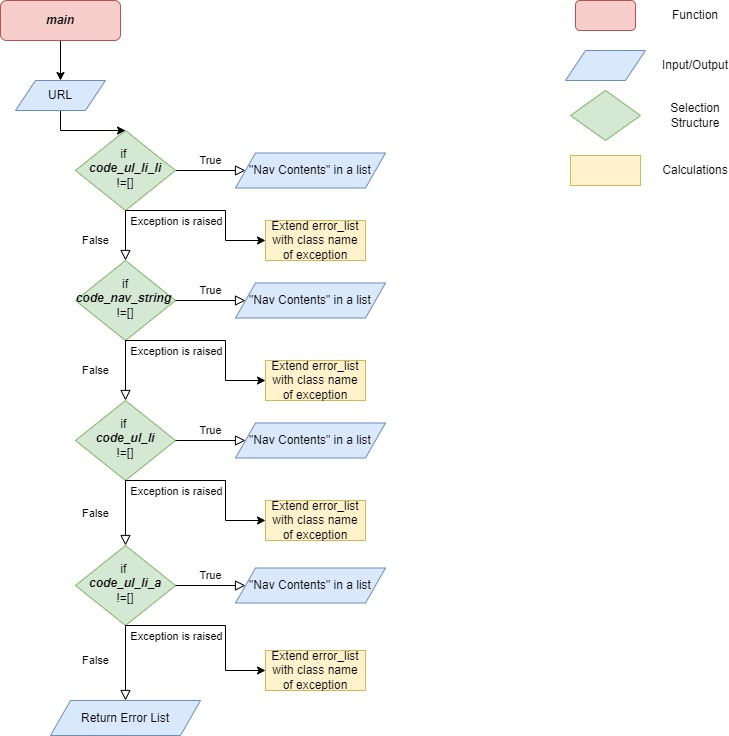

In [22]:
def main(url):
    error_exception = []
    try:
        if code_ul_li(url)!=[]: #Move to the next code if NONE output or EXCEPTION
            return code_ul_li(url)
        else:
            raise ValueError('Not found')
    except Exception as ex:
        error_exception.extend([sys.exc_info()[0]])
        try:
            if code_nav_string(url)!=[]: #Move to the next code if NONE output or EXCEPTION
                return code_nav_string(url)
            else:
                raise ValueError('Not found')
        except Exception as ex:
            error_exception.extend([sys.exc_info()[0]])
            try:
                if code_ul_li_li(url)!=[]: #Move to the next code if NONE output or EXCEPTION
                    return code_ul_li_li(url)
                else:
                    raise ValueError('Not found')
            except Exception as ex:
                error_exception.extend([sys.exc_info()[0]])
                try:
                    if code_ul_li_a(url)!=[]: #Move to the next code if NONE output or EXCEPTION
                        return code_ul_li_a(url)
                    else:
                        raise ValueError('Not found')
                except Exception as ex:
                    error_exception.extend([sys.exc_info()[0]])
    return error_exception

In [20]:
main('http://www.woznytaxco.com')

{'ul_li': {'Services': ['Tax Preparation',
   'Tax Planning',
   'Tax Issues',
   'Small Business Accounting',
   'Quickbooks Services',
   'Payroll',
   'Audits',
   'Bank Financing',
   'Strategic Business Planning',
   'New Business Formation',
   'Non-Profit Organizations'],
  'Client Forms': ['Upload Files']}}

In [23]:
main('https://sambrotman.com')

{'ul_li_a': ['Income Tax Audits',
  'Criminal Tax',
  'California Sales Tax Audits',
  'Multi-States Tax Issues',
  'California Payroll Tax Audits',
  'International Tax Issues',
  'IRS Tax Debt Resolution',
  'Tax Optimization',
  'California Tax Debt Resolution',
  'Business, Real Estate, & Transactional Tax',
  'Divorce & Taxes',
  'Big Ideas',
  'Learning Center',
  'Pricing',
  'Schedule a Consultation',
  'About',
  'Contact',
  'Income Tax Audits',
  'California Sales Tax Audits',
  'California Payroll Tax Audits',
  'IRS Tax Debt Resolution',
  'California Tax Debt Resolution',
  'Divorce & Taxes',
  'Criminal Tax',
  'Multi-States Tax Issues',
  'International Tax Issues',
  'Tax Optimization',
  'Business, Real Estate, & Transactional Tax',
  'Big Ideas',
  'Learning Center',
  'Pricing',
  'Schedule a Consultation',
  'About',
  'Contact',
  'Privacy Policy']}

In [52]:
main('http://www.paxpure.com') #Appending the whole Error

[(requests.exceptions.ConnectionError,
  requests.exceptions.ConnectionError(urllib3.exceptions.MaxRetryError("HTTPConnectionPool(host='www.paxpure.com', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000018FD4ED97C0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))")),
  <traceback at 0x18fd49bd600>),
 (requests.exceptions.ConnectionError,
  requests.exceptions.ConnectionError(urllib3.exceptions.MaxRetryError("HTTPConnectionPool(host='www.paxpure.com', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000018FD4ED9130>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respon

In [54]:
main('http://www.paxpure.com') #Printing only the 'class' of the Error

[requests.exceptions.ConnectionError,
 requests.exceptions.ConnectionError,
 requests.exceptions.ConnectionError,
 requests.exceptions.ConnectionError]

### _Trying codes on list of websites..._

In [26]:
urls = list(ddf[ddf.columns[3]])
url_random = sample(urls,20)  
output1= []
for url in tqdm(url_random):
    output1.append(main(url))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:28<00:00,  7.45s/it]


In [27]:
url_random

['https://www.odysseymedia.com',
 'http://www.dullestech.com/',
 'https://www.21stcenturyequityadvisors.com/',
 'http://www.grandperformances.org',
 'https://www.gregspearsrealty.com/',
 'https://www.jlpcpas.com/',
 'https://www.belamiecommercesolutions.com/',
 'https://www.cyclepedia.com/',
 'https://olr.com/',
 'https://www.lovcoconstruction.com',
 'https://www.reaction.global/',
 'https://www.cfnhomeloans.com',
 'https://www.addediq.com/',
 'https://www.recasafinancial.com',
 'https://www.virtualvisiontech.com',
 'https://www.bdaglobal.com',
 'https://www.viscot.com/',
 'https://www.lotusschool.org/',
 'https://www.indemco.com',
 'http://www.trademarkplasticscorp.com/']

In [28]:
output1

[[requests.exceptions.ConnectionError,
  requests.exceptions.ConnectionError,
  requests.exceptions.ConnectionError,
  requests.exceptions.ConnectionError],
 {'ul_li': {'WebGrants': ['Overview',
    'Features',
    'Customers',
    'Pricing',
    'Support',
    'Security'],
   'Contact': ['Contact Us', 'About Us']}},
 {'ul_li': {'About': ['Introduction',
    'Mission Statement & Investment Philosophy',
    'Thoughts on Retirement',
    'The Power of Compounding']}},
 {'ul_li': {'<autoplay speed=4></autoplay>Looking back at summer 2022': ['GP Season Recap'],
   'Concert video Archive': ['Watch on Youtube'],
   'Become a member today': ['Support The Arts']}},
 {'ul_li': {'Search': ['Advanced Search',
    'Search by Map',
    'Property Tracker',
    'Featured Listings'],
   'Buyers': ['Buyers',
    'Mortgage Calculator',
    'First Time Buyers',
    'Making an Offer',
    'What Are Closing Costs?',
    'Escrow: Now What?',
    'Financial Terms Glossary',
    'Personalized Home Search'],
 

In [170]:
error_list=[] #A list containing all the errors raise by each code
outputs_count = 0
for i in output1:
    if type(i) is list:
        for j in i:
            error_class = re.sub(r'\W+', '', str(j).split()[1])
            if error_class!='ValueError':
                error_list.append(error_class)
    else:
        outputs_count+=1
error_count = len(url_random)-outputs_count 

In [171]:
outputs_count, error_count

(15, 5)

In [175]:
error_list 

['requestsexceptionsConnectionError',
 'requestsexceptionsConnectionError',
 'requestsexceptionsConnectionError',
 'requestsexceptionsConnectionError',
 'AttributeError',
 'AttributeError',
 'requestsexceptionsSSLError',
 'requestsexceptionsSSLError',
 'requestsexceptionsSSLError',
 'requestsexceptionsSSLError',
 'AttributeError',
 'AttributeError',
 'AttributeError',
 'AttributeError']

In [176]:
el = pd.Series(error_list) #converting the errors_list into pandas series

In [177]:
errors_unique = list(el.unique()) #list of unique errors found during scraping of websites
errors_unique

['requestsexceptionsConnectionError',
 'AttributeError',
 'requestsexceptionsSSLError']